In [1]:
import cv2
import skimage.io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


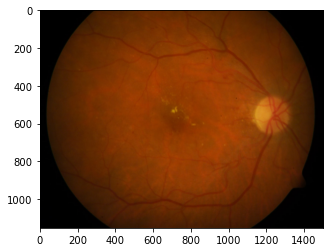

In [2]:
img = skimage.io.imread("diaretdb1_image001.jpg")
plt.imshow(img, cmap='gray')
plt.show()

In [3]:
green_channel = img[:,:,1]

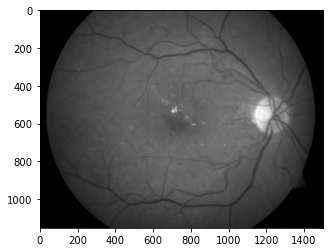

In [4]:
plt.imshow(green_channel, cmap='gray')
plt.show()

Text(0.5, 1.0, 'distribution of pixels')

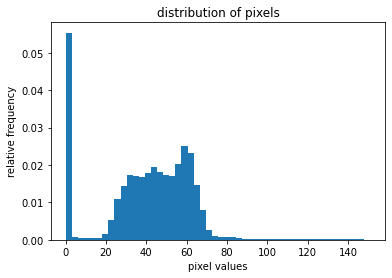

In [5]:
# python code to load and visualize
# an image

# import necessary libraries
from PIL import Image
import numpy as np

# convert PIL image to numpy array
img_np = np.array(green_channel)

# plot the pixel values
plt.hist(img_np.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")


In [6]:
equ = cv2.equalizeHist(green_channel)

Text(0.5, 1.0, 'distribution of pixels')

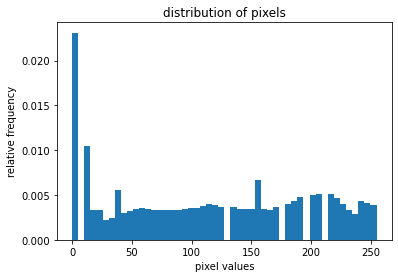

In [7]:
plt.hist(equ.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

Text(0.5, 1.0, 'distribution of pixels')

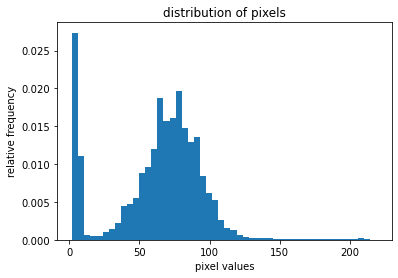

In [8]:
clahe= cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
clahe_img=clahe.apply(green_channel)
plt.hist(clahe_img.ravel(), bins=50, density=True)
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels")

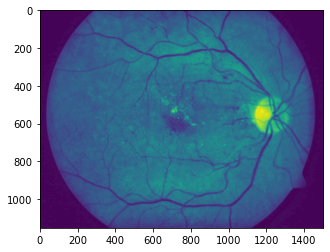

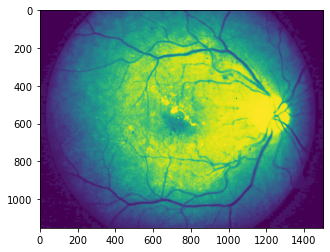

In [9]:
plt.imshow(clahe_img)
plt.show()
plt.imshow(equ)
plt.show()

In [10]:
# Python program to convert
# numpy array to image

# import required libraries
import numpy as np
from PIL import Image as im

# define a main function
def main():

	# create a numpy array from scratch
	# using arange function.
	# 1024x720 = 737280 is the amount
	# of pixels.
	# np.uint8 is a data type containing
	# numbers ranging from 0 to 255
	# and no non-negative integers
	
	# check type of array
	print(type(clahe_img))
	
	
	# creating image object of
	# above array
	data = im.fromarray(clahe_img)
	
	# saving the final output
	# as a PNG file
	data.save('imageForm_clahe_img.jpg')

# driver code
if __name__ == "__main__":
    main()


<class 'numpy.ndarray'>


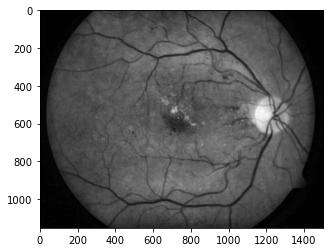

In [11]:
from PIL import Image, ImageFilter 
im1 = Image.open('imageForm_clahe_img.jpg') 
     
# applying the median filter 
im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
     
plt.imshow(im2, cmap='gray')
plt.show()

In [12]:
im2 = im2.save("clahe_image_medianFilter.jpg")
type(im2)

NoneType

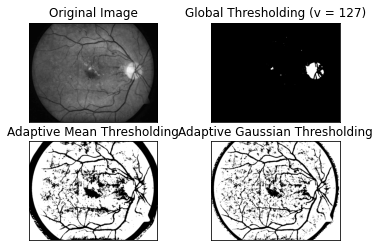

In [13]:
img = cv2.imread("clahe_image_medianFilter.jpg",0)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)



th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2,th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

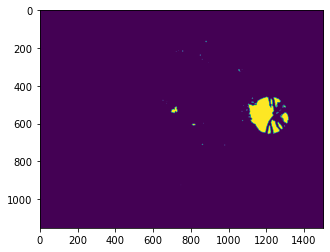

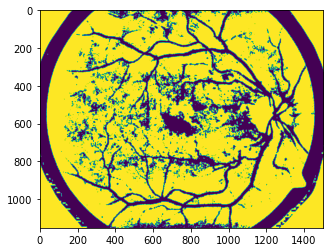

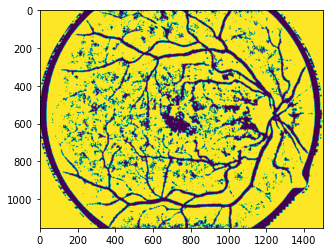

In [14]:
plt.imshow(th1)
plt.show()
plt.imshow(th2)
plt.show()
plt.imshow(th3)
plt.show()

In [15]:
# Python program to convert
# numpy array to image

# import required libraries
import numpy as np
from PIL import Image as im

# define a main function
def main():

	# create a numpy array from scratch
	# using arange function.
	# 1024x720 = 737280 is the amount
	# of pixels.
	# np.uint8 is a data type containing
	# numbers ranging from 0 to 255
	# and no non-negative integers
	
	# check type of array
	print(type(th2))
	
	
	# creating image object of
	# above array
	data = im.fromarray(th2)
	
	# saving the final output
	# as a PNG file
	data.save('claheImage_CmeanThreshold.jpg')

# driver code
if __name__ == "__main__":
    main()


<class 'numpy.ndarray'>


In [16]:
#Morphological operations

In [17]:
from skimage import color

Text(0.5, 1.0, 'Binarized Image')

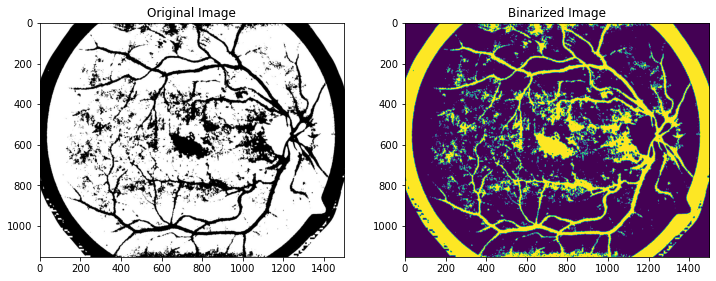

In [18]:
img = cv2.imread("claheImage_CmeanThreshold.jpg")
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(img);
ax[0].set_title('Original Image')
binary = color.rgb2gray(img)<0.15
ax[1].imshow(binary)
ax[1].set_title('Binarized Image')

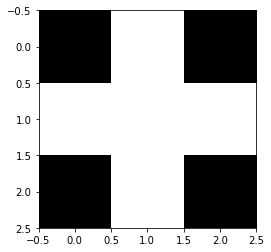

In [19]:
element = np.array([[0,2,0],
                    [2,2,2],
                    [0,2,0]])
plt.imshow(element, cmap='gray');

In [20]:
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)

In [21]:
type(img)

numpy.ndarray

In [24]:
# Python program to demonstrate erosion and
# dilation of images.
# Reading the input image
img = cv2.imread("claheImage_CmeanThreshold.jpg", 0)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5, 5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(img, kernel, iterations=1)
img_dilation = cv2.dilate(img, kernel, iterations=1)


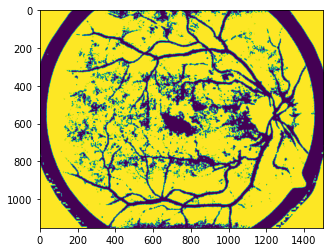

In [25]:
plt.imshow(img)
plt.show()


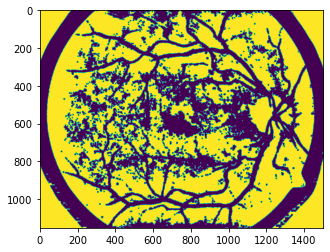

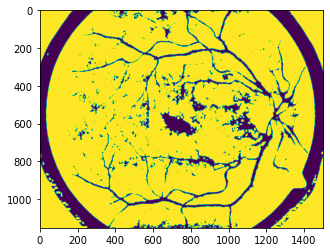

In [28]:
plt.imshow(img_erosion)
plt.show()
plt.imshow(img_dilation)
plt.show()

Text(0.5, 1.0, 'Multi-Dilated Image')

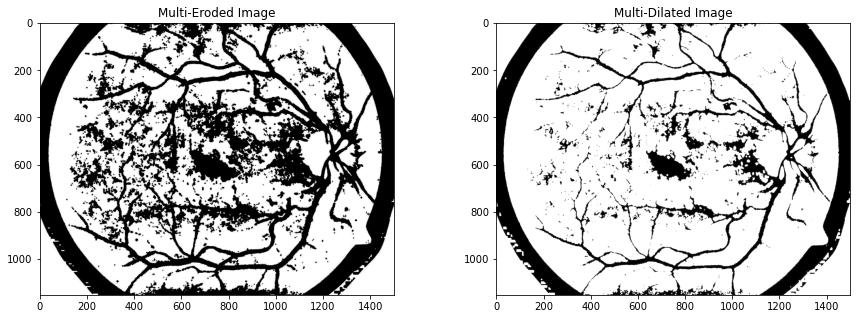

In [23]:
def multi_dil(im, num, element=element):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=element):
    for i in range(num):
        im = erosion(im, element)
    return im
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(multi_ero(img, 2, element), cmap='gray')
ax[0].set_title('Multi-Eroded Image')
ax[1].imshow(multi_dil(img, 2, element), cmap='gray')
ax[1].set_title('Multi-Dilated Image')